# Bagging
Bagging (short for bootstrap aggregating) is an ensemble method that combines multiple independent weak models, often deep decision trees, to create a stronger overall model.It falls under ensemble learning, similar to boosting, and is based on aggregating predictions from multiple models trained in parallel.
- **Comparison with Boosting**:
Bagging uses low-bias, high-variance models (e.g., deep trees). Boosting uses high-bias, low-variance models (e.g., shallow trees).
In bagging, models are trained independently and in parallel, making it faster.
In boosting, models are trained sequentially, where each model corrects errors from previous models, making it slower.
- **Bootstrap Aggregation**:
Bootstrap means sampling with replacement, so data points can appear in multiple samples.
Each sample of training data generates a deep decision tree independently, targeting different relationships in the data.
- **Prediction Process**:
During testing, each tree makes a prediction based on the test example.
The model aggregates predictions (e.g., via voting) from all trees to make the final prediction, improving accuracy through diversity in the independent predictions.
- **Advantages**:
Parallel Training: Faster due to independent training of each tree.
Effective for High Variance: Reduces variance by combining predictions from deep, high-variance trees.
Good for Uncorrelated Trees: Each tree’s independence helps capture unique data relationships, leading to better final predictions.
In short, bagging offers a reliable method for improving accuracy and robustness in models by aggregating predictions from independent, deep decision trees.
- **When to Use Bagging**:
Suitable for problems with categorical or continuous target variables.
Provides feature importance, helping to understand feature relationships with the target variable.
Flexible and fast to train; performs well on most problems, making it a good initial benchmark model.
Ideal for messy data (e.g., missing values, outliers, skewed data) due to its robustness.
- **When Not to Use Bagging**:
Interpretability: Difficult to understand the combined effect across hundreds of decision trees.
Not Always Optimal: Might not capture the full signal in the data, so if 100% accuracy is required, consider other more powerful algorithms.
Slower Prediction Time: While parallelizable in training, bagging models can be slower in making predictions due to the deeper trees.

- **Random Forest**: Random Forest is an ensemble method that builds multiple independent decision trees using the bagging technique, enhancing prediction accuracy and stability.
  
    - Parallelization: Independent trees allow for parallel training, making Random Forest faster than boosting methods, where trees are dependent.
    - Reduced Correlation: Ensures trees represent unique sections of data, avoiding redundancy and reducing model variance.
    - Applicability:
        * Useful for both regression and classification problems.
        * For regression: Averages outputs from each tree.
        * For classification: Uses voting across all trees for the final output.
    - Bagging with a Twist:
        * Standard Bagging: Uses training data samples with replacement to build each tree.
        * Random Forest Wrinkle: Samples both data examples and features for each tree, ensuring each tree learns different patterns in subsets of data and features.
        * Results in high variance models with uncorrelated trees.
    - Benefits:
        * Flexibility & Robustness: Performs well on messy data with mixed data types.
        * Efficiency: Trains quickly with low risk of overfitting, making it a widely-used algorithm for machine learning practitioners.

In [32]:
# import relevant libraries
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
# Check the hyper parameters
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
# Read data
X_train = pd.read_csv('./data/train_features.csv')
y_train = pd.read_csv('./data/train_labels.csv')
X_train.head()

,Unnamed: 0,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,570,2,0,62.0,10.5000,0,0
1,787,3,0,8.0,29.1250,5,0
2,74,3,0,32.0,56.4958,0,0
3,113,3,1,20.0,9.8250,1,0
4,635,2,1,28.0,13.0000,0,0


In [14]:
y_train.head()

,Survived
0,1
1,0
2,1
3,0
4,1


In [20]:
# Create helper function for printing the results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{} for {}'.format(round(mean,3), round(std*2,3), params))


In [22]:
# Initialize the Random Forest model
rf = RandomForestClassifier()

# Define the hyperparameter grid for tuning
parameters = {
    'n_estimators': [5,50,250,500],
    'max_depth': [4,8,16,32,None]
}

# Set up GridSearchCV with 5-fold cross-validation
cv = GridSearchCV(rf, parameters, cv=5)

# Fit the model on the training data with the hyperparameter grid
cv.fit(X_train, y_train.values.ravel())

# Print the results of the grid search to find the best parameters and performance
print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.787 (+/-0.09 for {'max_depth': 4, 'n_estimators': 5}
0.818 (+/-0.134 for {'max_depth': 4, 'n_estimators': 50}
0.826 (+/-0.112 for {'max_depth': 4, 'n_estimators': 250}
0.811 (+/-0.128 for {'max_depth': 4, 'n_estimators': 500}
0.8 (+/-0.113 for {'max_depth': 8, 'n_estimators': 5}
0.817 (+/-0.086 for {'max_depth': 8, 'n_estimators': 50}
0.817 (+/-0.1 for {'max_depth': 8, 'n_estimators': 250}
0.813 (+/-0.094 for {'max_depth': 8, 'n_estimators': 500}
0.8 (+/-0.075 for {'max_depth': 16, 'n_estimators': 5}
0.807 (+/-0.069 for {'max_depth': 16, 'n_estimators': 50}
0.818 (+/-0.078 for {'max_depth': 16, 'n_estimators': 250}
0.802 (+/-0.074 for {'max_depth': 16, 'n_estimators': 500}
0.785 (+/-0.095 for {'max_depth': 32, 'n_estimators': 5}
0.809 (+/-0.073 for {'max_depth': 32, 'n_estimators': 50}
0.813 (+/-0.081 for {'max_depth': 32, 'n_estimators': 250}
0.805 (+/-0.08 for {'max_depth': 32, 'n_estimators': 500}
0.798 (+/-0.085 for {'max_depth'

In [24]:
# Get the best estimators
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

In [26]:
# Write the pickled model
#joblib.dump(cv.best_estimator_, './data/models/RF_model.pkl')

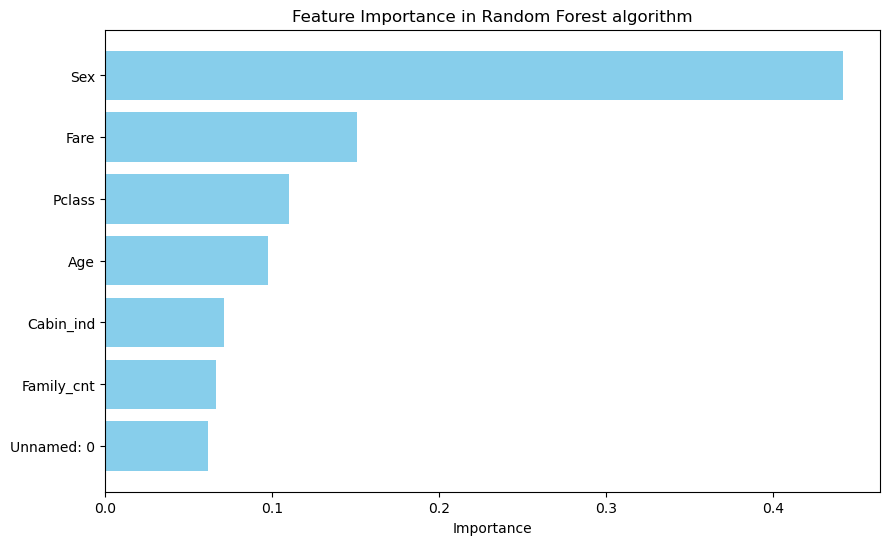

In [44]:
# Plot Feature importance

# Step 1: Get the best estimator from GridSearchCV
best_rf = cv.best_estimator_

# Step 2: Extract feature importances from the best model
feature_importances = best_rf.feature_importances_

# Step 3: Create a DataFrame for feature names and their corresponding importance
features = X_train.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Step 4: Sort the DataFrame by importance 
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Step 5: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest algorithm')
plt.show()
